<a href="https://colab.research.google.com/github/Nizar-Gadari/Project-1-/blob/main/rfm_analysis_ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Online Retail.csv to Online Retail.csv


In [ ]:
import pandas as pd

df = pd.read_csv("Online Retail.csv", encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

df = df[df['CustomerID'].notnull()].copy()

df = df[~df['InvoiceNo'].astype(str).str.startswith('C')].copy()

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

snapshot_date = df['InvoiceDate'].max()

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm = rfm[rfm['Monetary'] > 0]

In [ ]:
rfm['R'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

rfm['RFM_Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm['RFM_Score'] = rfm[['R','F','M']].astype(int).sum(axis=1)

def segment(score):
    if score >= 12:
        return 'Champions'
    elif score >= 9:
        return 'Loyal Customers'
    elif score >= 6:
        return 'At Risk'
    else:
        return 'Lost'

rfm['Segment'] = rfm['RFM_Score'].apply(segment)


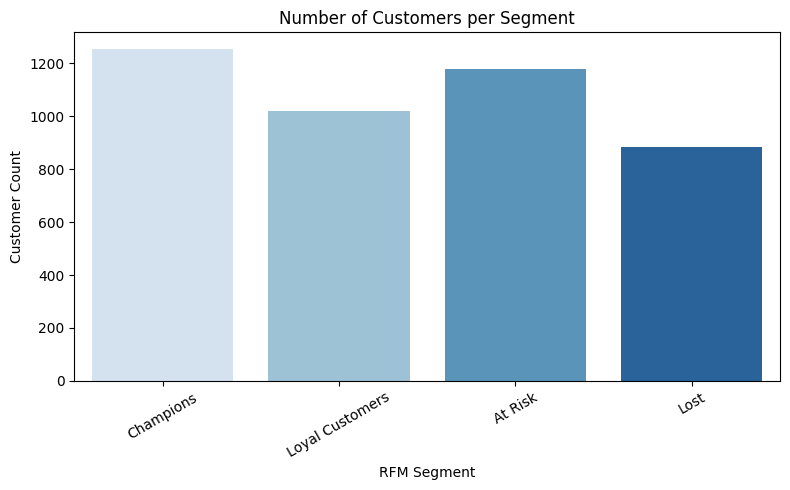

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=rfm, x='Segment', order=['Champions', 'Loyal Customers', 'At Risk', 'Lost'], palette='Blues')
plt.title('Number of Customers per Segment')
plt.ylabel('Customer Count')
plt.xlabel('RFM Segment')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [ ]:
rfm.to_csv("rfm_segments.csv", index=False)
files.download("rfm_segments.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>